# Exploration and Analysis
by Wilson Lee

    -Data Exploration and Analysis for the in class Kaggle competition "CEBD 1260 - Classification - Predict Adoption Speed"
    -Data Source https://www.kaggle.com/c/cedb1260c/data

## Import Libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Processed Data

In [2]:
df_train = pd.read_csv("../../Data/Processed/train_cleaned.csv")
df_test = pd.read_csv("../../Data/Processed/test_cleaned.csv")

## Preview Data

In [3]:
df_train

,Type,Age,Gender,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,Name_phrase_name,Name_no_name,Name_baby,...,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415,fee_per_pet,has_fee,more_than_1
0,1,36,1,0,3f8824a3b,1.0,4,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
1,2,3,0,0,9238eb7fc,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2,2,7,0,0,f0a1f2b90,2.0,4,0,0,0,...,0,0,0,0,0,0,0,0.0,0,1
3,1,3,0,0,7d028bdea,4.0,2,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
4,2,1,0,0,8377bfe97,0.0,2,0,0,0,...,0,0,0,0,0,1,0,0.0,0,0
5,1,3,0,0,965b31ba7,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
6,1,2,1,0,3760c73b1,1.0,4,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
7,1,8,1,0,f41a7de83,2.0,4,0,0,0,...,1,0,0,0,0,0,0,0.0,0,0
8,2,1,1,0,7b660c6af,4.0,3,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
9,1,6,0,0,f94c2a347,2.0,4,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0


In [4]:
df_test

,Type,Age,Gender,VideoAmt,PetID,PhotoAmt,Name_phrase_name,Name_no_name,Name_baby,Name_puppy,...,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415,fee_per_pet,has_fee,more_than_1
0,2,1,0,0,f42161740,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
1,1,6,1,0,0118db3a8,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
2,1,2,1,0,e5164d828,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0.000000,0,0
3,1,10,0,0,5335bfb38,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
4,1,12,0,0,ff2cf88a0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
5,2,1,1,0,1d13441b9,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
6,2,4,2,0,7d835cf7c,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
7,1,3,1,0,577d15fea,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
8,1,2,2,0,91736f444,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
9,2,2,2,0,db194aec8,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1


## Get Column List

In [5]:
list_of_all_columns = df_train.columns.values
print(list_of_all_columns)

['Type' 'Age' 'Gender' ... 'fee_per_pet' 'has_fee' 'more_than_1']


## Check Log Price Distribution

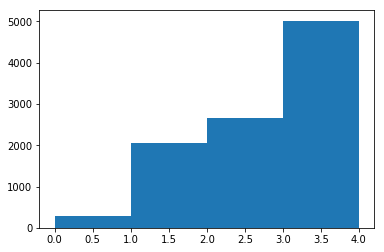

In [6]:
# Analize pricing distribution

# Histogram
plt.hist(df_train['AdoptionSpeed'], bins=4, label="AdoptionSpeed")
plt.show()


## Plot Columns

In [7]:
def plotfunction(x,y):
    plt.figure(figsize=(10,10))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(df_train[x], df_train[y], 'o', alpha=0.01)
    plt.show()
    

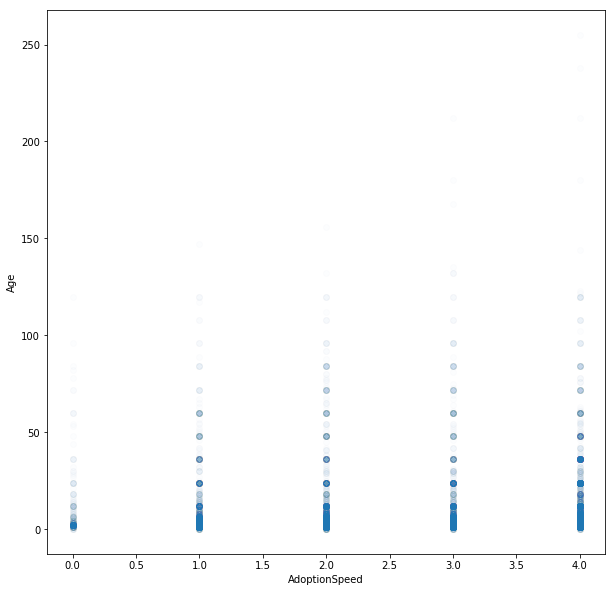

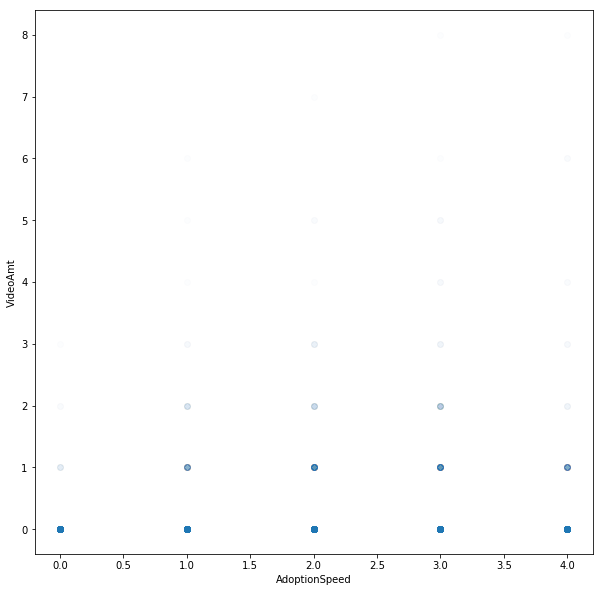

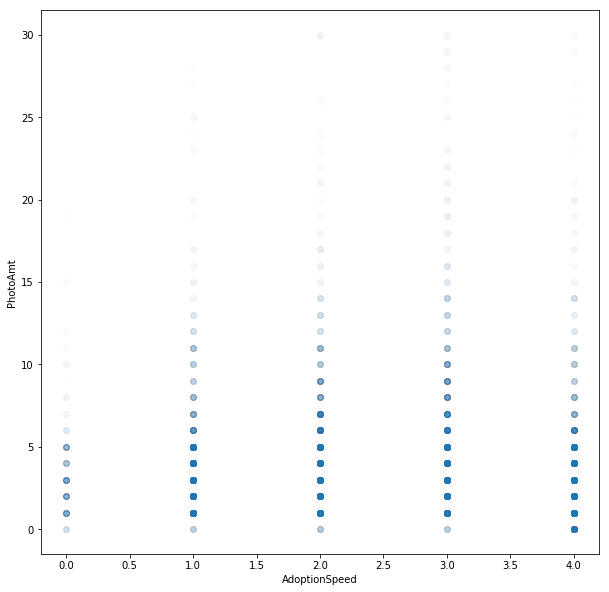

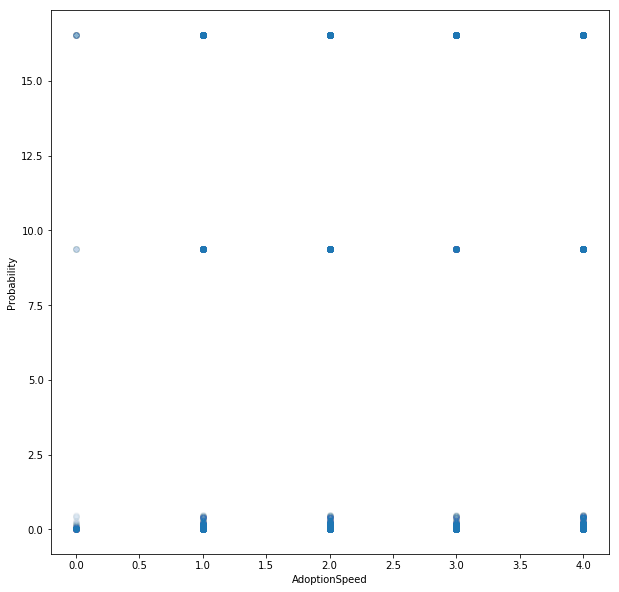

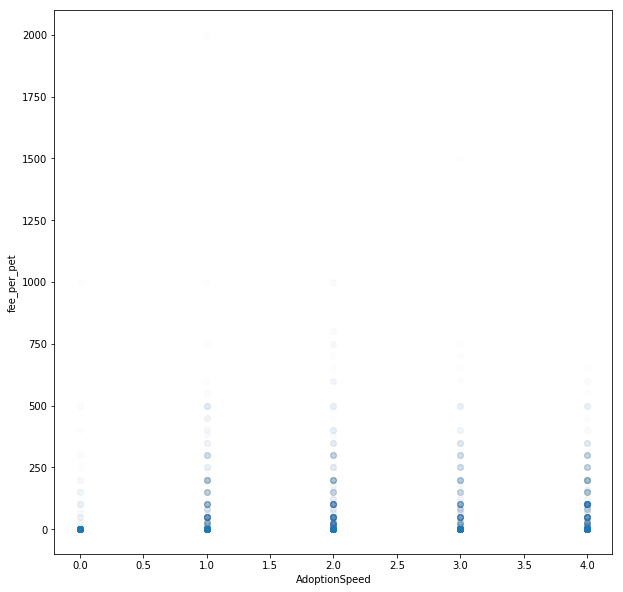

In [8]:
list_of_standard_columns = ['Age', 'VideoAmt','PhotoAmt', 'Probability','fee_per_pet']
for column in list_of_standard_columns:
    plotfunction('AdoptionSpeed', column)